In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('diagnostico-tic-prefeitura-sp-2020.csv', sep=';', encoding='latin-1')

#### <font color=green> Obs: visualizações serão implementadas posteriormente</font>

### 1. Separado por categorias, segue a quantidade de órgãos que responderam à pesquisa

In [3]:
quantidades = dados['Q06'].value_counts()
print(quantidades)

Q06
Subprefeitura                     32
Secretaria Municipal              24
Autarquia, Fundação ou Empresa    15
Name: count, dtype: int64


### 2. Pessoas que trabalharam, de forma dedicada à TI, na Prefeitura de São Paulo

In [4]:
dados['Q201'].sum()

762

### 3. Proporção de pessoas que trabalharam de forma dedicada à TI na Prefeitura de São Paulo, por categoria.

In [5]:
sub_df = dados[['Q201', 'Q06']].groupby('Q06').sum()
sub_df

,Q201
Q06,
"Autarquia, Fundação ou Empresa",285
Secretaria Municipal,390
Subprefeitura,87


### 4. Quantidade de órgãos que utilizam alguma metodologia para gerenciamento de projetos

In [6]:
qtde = dados['Q713'].value_counts()['Sim']
print(f'Há um total de \033[91m{qtde}\033[00m órgãos que utilizam de metodologias para o gerenciamento de projetos')


Há um total de 9 órgãos que utilizam de metodologias para o gerenciamento de projetos


### 5. Proporção de computadores que possuem mais de 5 anos e ainda são utilizados na Prefeitura de São Paulo

In [7]:
dados.fillna(0, inplace=True)

proprios = dados['Q1001[SQ001_SQ008]'].sum()
locados = int(dados['Q1001[SQ001_SQ009]'].sum())
proprios_5_anos = dados['Q1002[SQ001]'].sum()
inserviveis = dados['Q604[SQ001]'].sum()

total_em_uso = (locados + proprios) - inserviveis

In [8]:
print('Proporção de computadores em uso com mais de cinco anos: {:.1f}%'.format(proprios_5_anos*100/total_em_uso))

Proporção de computadores em uso com mais de cinco anos: 55.9%


### 6. Total de ativos de rede que estão sob gestão direta dos órgãos da Prefeitura de São Paulo, por tipo:

In [10]:
list_labels = [
'Computador desktop', 
'Impressora sem scanner', 
'Impressora Multifuncional', 
'Notebook', 
'Tablet', 
'Celular Corporativo', 
'Projetor multimídia', 
'Scanner de produção', 
'Nobreak'
]

In [12]:
list_columns, list_sums = [], []

for column in dados.columns:
    if column.startswith('Q1001'):
        list_columns.append(column)

for i, column in enumerate(list_columns):
    if column.endswith('_SQ008]'):        
        list_sums.append(int(dados[column].sum() + dados[list_columns[i+1]].sum()))
        
dict_totais_ativos_rede = dict(zip(list_labels, list_sums))
dict_totais_ativos_rede

{'Computador desktop': 46525,
 'Impressora sem scanner': 1912,
 'Impressora Multifuncional': 3426,
 'Notebook': 24608,
 'Tablet': 327,
 'Celular Corporativo': 6184,
 'Projetor multimídia': 855,
 'Scanner de produção': 214,
 'Nobreak': 772}

### 7. Completar a frase observando o histograma

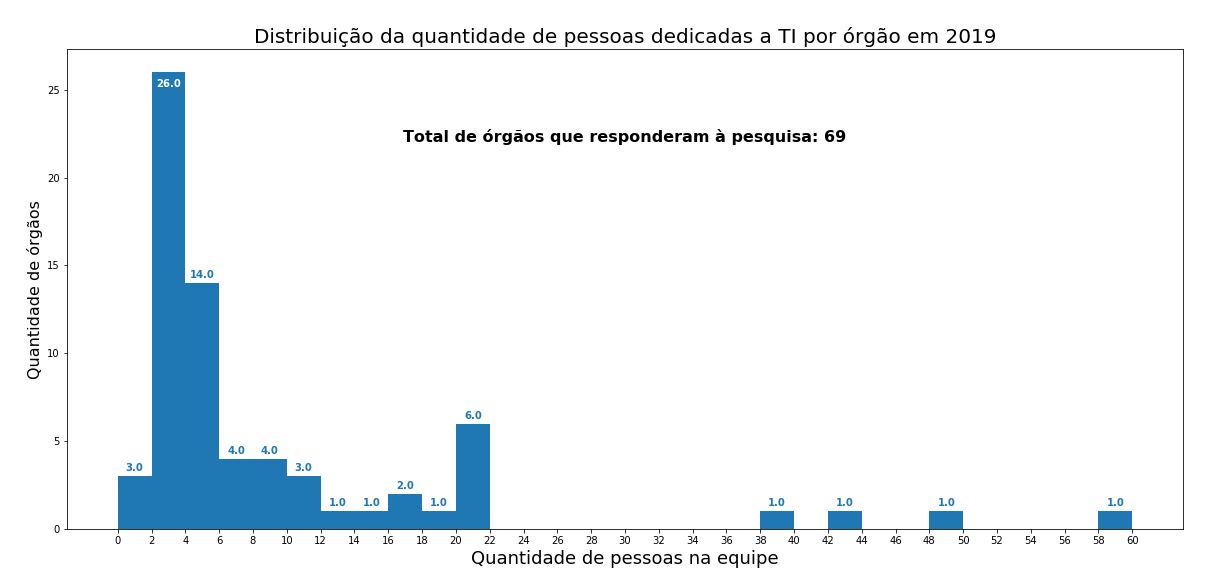

<i> "De acordo com o Diagnóstico de 2019, metade dos órgãos setoriais da prefeitura possuem, no máximo, <font color='blue'>três</font> pessoas trabalhando de forma dedicada à área de TI"</i>